# GliderData 

In [2]:
import xarray as xa

import matplotlib as mpl
import matplotlib.pyplot as plt


In [3]:
file = '/Users/bell/ecoraid/2020/Profilers/OculusGlider/pugetsound_20200804/p4020005.nc'
xdf = xa.load_dataset(file)

In [4]:
xdf.dims

Frozen(SortedKeysDict({'sbect_data_point': 2463, 'ctd_data_point': 2463, 'sg_data_point': 411, 'magnetometer_data_point': 411, 'depth_data_point': 409, 'gc_event': 56, 'gc_state': 12, 'gps_info': 3, 'trajectory': 1}))

In [7]:
xdf

<xarray.Dataset>
Dimensions:                       (ctd_data_point: 2463, depth_data_point: 409, gc_event: 56, gc_state: 12, gps_info: 3, magnetometer_data_point: 411, sbect_data_point: 2463, sg_data_point: 411, trajectory: 1)
Coordinates:
    ctd_time                      (ctd_data_point) datetime64[ns] 2020-08-04T...
    latitude                      (ctd_data_point) float64 47.73 47.73 ... 47.72
    ctd_depth                     (ctd_data_point) float64 1.088 ... 0.1031
    longitude                     (ctd_data_point) float64 -122.4 ... -122.4
  * trajectory                    (trajectory) int32 5
Dimensions without coordinates: ctd_data_point, depth_data_point, gc_event, gc_state, gps_info, magnetometer_data_point, sbect_data_point, sg_data_point
Data variables:
    sbect_condFreq                (sbect_data_point) float64 6.295e+03 ... 6....
    salinity_qc                   (ctd_data_point) |S1 b'4' b'4' ... b'3' b'3'
    speed_qc                      (ctd_data_point) |S1 b'4' b'4' ... b'1' b'8'
    speed                         (ctd_data_point) float64 nan nan ... 5.843
    dissolved_oxygen_sat          (ctd_data_point) float64 nan nan ... nan nan
    density                       (ctd_data_point) float64 nan nan ... 1.022e+03
    sigma_t                       (ctd_data_point) float64 nan nan ... nan nan
    vert_speed_gsm                (ctd_data_point) float64 -12.08 ... 9.648
    temperature_raw_qc            (ctd_data_point) |S1 b'1' b'1' ... b'1' b'3'
    vert_speed                    (ctd_data_point) float64 nan nan ... 3.298
    conductivity_raw              (ctd_data_point) float64 3.562 3.564 ... 3.622
    sbect_time                    (sbect_data_point) float64 1.597e+09 ... 1....
    conductivity                  (ctd_data_point) float64 nan nan ... 3.622
    glide_angle                   (ctd_data_point) float64 nan nan ... 34.37
    latitude_gsm                  (ctd_data_point) float64 47.73 47.73 ... 47.72
    theta                         (ctd_data_point) float64 nan nan ... nan nan
    north_displacement            (ctd_data_point) float64 0.0 0.0 ... -0.03132
    temperature                   (ctd_data_point) float64 14.27 14.26 ... 14.62
    east_displacement             (ctd_data_point) float64 0.0 0.0 ... -0.03654
    salinity_raw                  (ctd_data_point) float64 28.98 29.0 ... 29.26
    temperature_qc                (ctd_data_point) |S1 b'1' b'1' ... b'1' b'8'
    buoyancy                      (ctd_data_point) float64 nan nan ... 31.93
    conductivity_qc               (ctd_data_point) |S1 b'4' b'4' ... b'8' b'8'
    east_displacement_gsm         (ctd_data_point) float64 0.0 ... -0.1322
    temperature_raw               (ctd_data_point) float64 14.27 14.27 ... 14.62
    conductivity_raw_qc           (ctd_data_point) |S1 b'1' b'3' ... b'3' b'3'
    density_insitu                (ctd_data_point) float64 nan nan ... 1.022e+03
    sbect_tempFreq                (sbect_data_point) float64 4.641e+03 ... 4....
    horz_speed_gsm                (ctd_data_point) float64 12.09 12.09 ... 17.44
    longitude_gsm                 (ctd_data_point) float64 -122.4 ... -122.4
    sound_velocity                (ctd_data_point) float64 nan nan ... nan nan
    glide_angle_gsm               (ctd_data_point) float64 -44.96 ... 28.95
    north_displacement_gsm        (ctd_data_point) float64 0.0 ... -0.1133
    ctd_pressure                  (ctd_data_point) float64 1.097 ... 0.1043
    speed_gsm                     (ctd_data_point) float64 17.09 17.09 ... 19.93
    sigma_theta                   (ctd_data_point) float64 nan nan ... nan nan
    salinity_raw_qc               (ctd_data_point) |S1 b'1' b'3' ... b'3' b'3'
    salinity                      (ctd_data_point) float64 nan nan ... nan nan
    horz_speed                    (ctd_data_point) float64 nan nan ... 4.823
    eng_depth                     (sg_data_point) float64 128.0 238.0 ... 26.0
    eng_pitchAng                  (sg_data_point) float64 -37.4 -49

## drop dimensions (subset for future use on erddap
- glider control feedback and location
+ gc_event, gc_state, sg_data_point
- gps
+ magnetometer_data_point
+ gps_info
- depth

This leaves CTD data and scalar data

In [178]:
xdf_ctd = xdf.drop_dims(['gc_event','gc_state','sbect_data_point','magnetometer_data_point','sg_data_point','gps_info','depth_data_point','trajectory'])

In [179]:
xdf_ctd

<xarray.Dataset>
Dimensions:                       (ctd_data_point: 2463)
Coordinates:
    ctd_time                      (ctd_data_point) datetime64[ns] 2020-08-04T...
    latitude                      (ctd_data_point) float64 47.73 47.73 ... 47.72
    ctd_depth                     (ctd_data_point) float64 1.088 ... 0.1031
    longitude                     (ctd_data_point) float64 -122.4 ... -122.4
Dimensions without coordinates: ctd_data_point
Data variables:
    salinity_qc                   (ctd_data_point) |S1 b'4' b'4' ... b'3' b'3'
    speed_qc                      (ctd_data_point) |S1 b'4' b'4' ... b'1' b'8'
    speed                         (ctd_data_point) float64 nan nan ... 5.843
    dissolved_oxygen_sat          (ctd_data_point) float64 nan nan ... nan nan
    density                       (ctd_data_point) float64 nan nan ... 1.022e+03
    sigma_t                       (ctd_data_point) float64 nan nan ... nan nan
    vert_speed_gsm                (ctd_data_point) float64 -12.08 ... 9.648
    temperature_raw_qc            (ctd_data_point) |S1 b'1' b'1' ... b'1' b'3'
    vert_speed                    (ctd_data_point) float64 nan nan ... 3.298
    conductivity_raw              (ctd_data_point) float64 3.562 3.564 ... 3.622
    conductivity                  (ctd_data_point) float64 nan nan ... 3.622
    glide_angle                   (ctd_data_point) float64 nan nan ... 34.37
    latitude_gsm                  (ctd_data_point) float64 47.73 47.73 ... 47.72
    theta                         (ctd_data_point) float64 nan nan ... nan nan
    north_displacement            (ctd_data_point) float64 0.0 0.0 ... -0.03132
    temperature                   (ctd_data_point) float64 14.27 14.26 ... 14.62
    east_displacement             (ctd_data_point) float64 0.0 0.0 ... -0.03654
    salinity_raw                  (ctd_data_point) float64 28.98 29.0 ... 29.26
    temperature_qc                (ctd_data_point) |S1 b'1' b'1' ... b'1' b'8'
    buoyancy                      (ctd_data_point) float64 nan nan ... 31.93
    conductivity_qc               (ctd_data_point) |S1 b'4' b'4' ... b'8' b'8'
    east_displacement_gsm         (ctd_data_point) float64 0.0 ... -0.1322
    temperature_raw               (ctd_data_point) float64 14.27 14.27 ... 14.62
    conductivity_raw_qc           (ctd_data_point) |S1 b'1' b'3' ... b'3' b'3'
    density_insitu                (ctd_data_point) float64 nan nan ... 1.022e+03
    horz_speed_gsm                (ctd_data_point) float64 12.09 12.09 ... 17.44
    longitude_gsm                 (ctd_data_point) float64 -122.4 ... -122.4
    sound_velocity                (ctd_data_point) float64 nan nan ... nan nan
    glide_angle_gsm               (ctd_data_point) float64 -44.96 ... 28.95
    north_displacement_gsm        (ctd_data_point) float64 0.0 ... -0.1133
    ctd_pressure                  (ctd_data_point) float64 1.097 ... 0.1043
    speed_gsm                     (ctd_data_point) float64 17.09 17.09 ... 19.93
    sigma_theta                   (ctd_data_point) float64 nan nan ... nan nan
    salinity_raw_qc               (ctd_data_point) |S1 b'1' b'3' ... b'3' b'3'
    salinity                      (ctd_data_point) float64 nan nan ... nan nan
    horz_speed                    (ctd_data_point) float64 nan nan ... 4.823
    log_DEVICES                   |S294 b'Pitch_motor,Roll_motor,VBD_pump_dur...
    log_DEVICE_SECS               |S161 b'47.225,50.275,113.925,0.000,0.000,2...
    log_DEVICE_MAMPS              |S155 b'135.405,60.435,1155.915,0.000,0.000...
    log_SM_GC                     |S101 b'1.45,22.50,2.47,0.00,0.023,0.023,0....
    log_GPS2                      |S71 b'$GPS2,040820,193411,4743.7041,-12224...
    log_GPS1                      |S69 b'$GPS1,040820,192533,4743.7593,-12224...
    log_GPS                       |S69 b'$GPS,040820,201812,4743.290,-12224.5...
    log_SENSOR_SECS               |S62 b'0.000,0.000,0.000,0.000,0.000,0.000,...
    log_SENSOR_MAMPS              |S60 b'0.000,0.000,0.

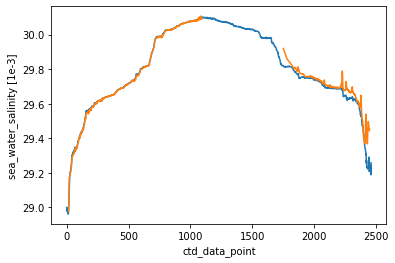

In [272]:
xdf_ctd.salinity_raw.plot()
xdf_ctd.salinity.plot()

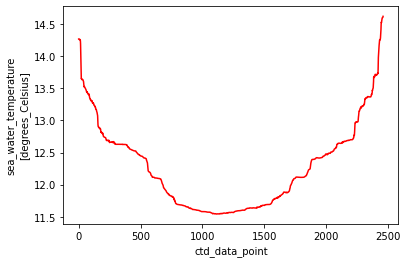

In [262]:
xdf_ctd.temperature.plot(color='r')

In [198]:
tt = xdf_ctd.where(xdf_ctd.ctd_depth==xdf_ctd.ctd_depth.max(), drop=True).ctd_time.values

down =xdf_ctd.where(xdf_ctd.ctd_time<=tt, drop=True)
up =xdf_ctd.where(xdf_ctd.ctd_time>=tt, drop=True) 

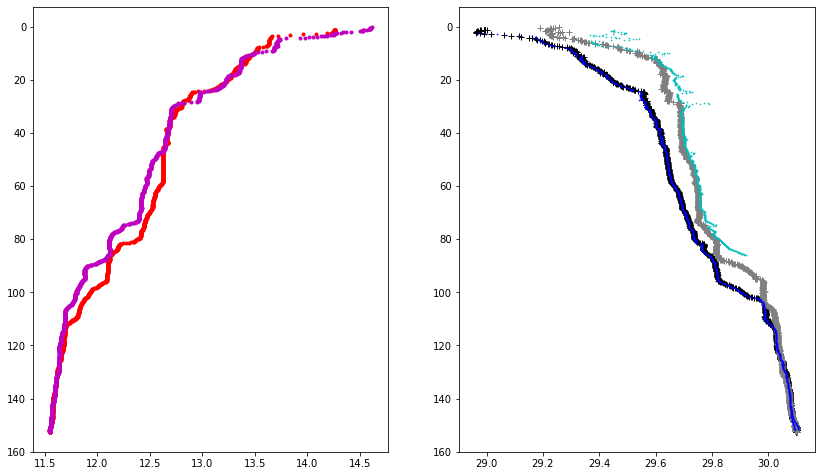

In [271]:
fig, ax = plt.subplots(1,2,figsize=(14, 18))

ax=plt.subplot(221)
plt.plot(down.temperature,down.ctd_depth,'r.')
plt.plot(up.temperature,up.ctd_depth,'m.')
ax.invert_yaxis()

ax=plt.subplot(222)
plt.plot(down.salinity,down.ctd_depth,'b.',markersize=1.25)
plt.plot(up.salinity,up.ctd_depth,'c.',markersize=1.25)
plt.plot(down.salinity_raw,down.ctd_depth,'k+',zorder=0)
plt.plot(up.salinity_raw,up.ctd_depth,'+',c='grey',zorder=0)
ax.invert_yaxis()

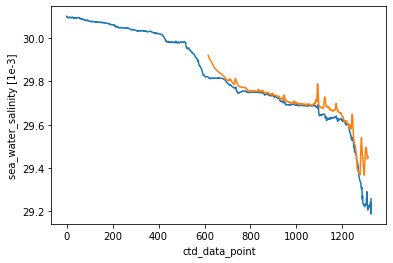

In [263]:
up.salinity_raw.plot()
up.salinity.plot()

In [255]:
down.to_dataframe()

,salinity_qc,speed_qc,speed,dissolved_oxygen_sat,density,sigma_t,vert_speed_gsm,temperature_raw_qc,vert_speed,conductivity_raw,...,flight_avg_speed_north,flight_avg_speed_east_gsm,depth_avg_curr_north,depth_avg_curr_error,surface_curr_north,flight_avg_speed_east,ctd_time,latitude,ctd_depth,longitude
ctd_data_point,,,,,,,,,,,,,,,,,,,,,
0,b'4',b'4',NaN,NaN,NaN,NaN,-12.075608,b'1',NaN,3.562032,...,-0.111165,-0.026808,-0.18045,0.003673,-19.771102,-0.006487,2020-08-04 19:34:37.404000000,47.728402,1.087677,-122.407552
1,b'4',b'4',NaN,NaN,NaN,NaN,-12.075608,b'1',NaN,3.563929,...,-0.111165,-0.026808,-0.18045,0.003673,-19.771102,-0.006487,2020-08-04 19:34:38.161999872,47.728401,1.087677,-122.407552
2,b'4',b'4',NaN,NaN,NaN,NaN,-12.075608,b'1',NaN,3.562863,...,-0.111165,-0.026808,-0.18045,0.003673,-19.771102,-0.006487,2020-08-04 19:34:38.920000000,47.728400,1.087677,-122.407552
3,b'4',b'4',NaN,NaN,NaN,NaN,-12.075608,b'3',NaN,3.562442,...,-0.111165,-0.026808,-0.18045,0.003673,-19.771102,-0.006487,2020-08-04 19:34:39.703000064,47.728399,1.087677,-122.407552
4,b'4',b'4',NaN,NaN,NaN,NaN,-12.075608,b'3',NaN,3.563012,...,-0.111165,-0.026808,-0.18045,0.003673,-19.771102,-0.006487,2020-08-04 19:34:40.707000064,47.728397,1.087677,-122.407552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,b'4',b'4',NaN,NaN,NaN,NaN,-1.283590,b'3',NaN,3.460473,...,-0.111165,-0.026808,-0.18045,0.003673,-19.771102,-0.006487,2020-08-04 19:53:29.700999936,47.724366,152.439598,-122.407996
1134,b'4',b'4',NaN,NaN,NaN,NaN,-1.218672,b'1',NaN,3.460582,...,-0.111165,-0.026808,-0.18045,0.003673,-19.771102,-0.006487,2020-08-04 19:53:30.700999936,47.724364,152.443349,-122.407997
1135,b'4',b'4',NaN,NaN,NaN,NaN,-1.153625,b'3',NaN,3.460509,...,-0.111165,-0.026808,-0.18045,0.003673,-19.771102,-0.006487,2020-08-04 19:53:31.703000064,47.724362,152.447108,-122.407997


In [ ]:
# try altair?